# Plotting 2d vectors

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from sympy import symbols, Eq, solve

In [2]:
vector_1 = np.array([2.35, 4])
vector_2 = np.array([1, -2.5])
vector_3 = np.array([-1.24, 3])

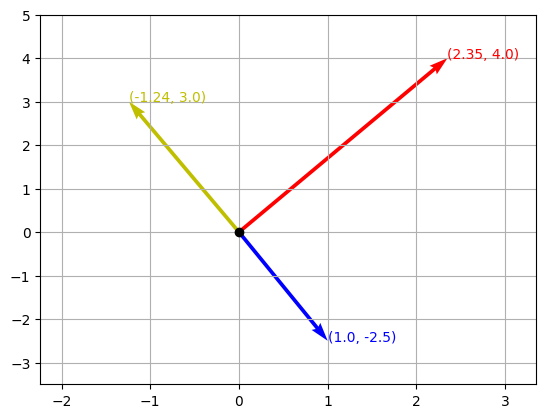

In [3]:
fig, ax = plt.subplots()

qv1 = ax.quiver(0, 0, vector_1[0], vector_1[1], angles='xy', scale_units='xy', scale=1, color='r')
qv2 = ax.quiver(0, 0, vector_2[0], vector_2[1], angles='xy', scale_units='xy', scale=1, color='b')
qv3 = ax.quiver(0, 0, vector_3[0], vector_3[1], angles='xy', scale_units='xy', scale=1, color='y')

ax.set_xlim([min(vector_1[0],vector_2[0],vector_3[0])-1, max(vector_1[0], vector_2[0], vector_3[0])+1])
ax.set_ylim([min(vector_1[1],vector_2[1],vector_3[1])-1, max(vector_1[1], vector_2[1], vector_3[1])+1])

ax.text(vector_1[0], vector_1[1], f'({vector_1[0]}, {vector_1[1]})', color='r', fontsize=10)
ax.text(vector_2[0], vector_2[1], f'({vector_2[0]}, {vector_2[1]})', color='b', fontsize=10)
ax.text(vector_3[0], vector_3[1], f'({vector_3[0]}, {vector_3[1]})', color='y', fontsize=10)


plt.plot(0, 0, marker="o", color="black")
plt.grid()
plt.show()

# Plotting 3d vectors

In [4]:
vector_1 = np.array([2, 8, 6])
vector_2 = np.array([-2, -4, 5])
vector_3 = np.array([2, 4, 2])

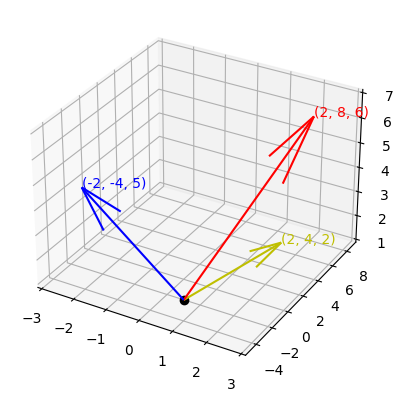

In [5]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.quiver(0, 0, 0, vector_1[0], vector_1[1], vector_1[2], color="r")
ax.quiver(0, 0, 0, vector_2[0], vector_2[1], vector_2[2], color="b")
ax.quiver(0, 0, 0, vector_3[0], vector_3[1], vector_3[2], color="y")

ax.set_xlim([min(vector_1[0],vector_2[0],vector_3[0])-1, max(vector_1[0], vector_2[0], vector_3[0])+1])
ax.set_ylim([min(vector_1[1],vector_2[1],vector_3[1])-1, max(vector_1[1], vector_2[1], vector_3[1])+1])
ax.set_zlim([min(vector_1[2],vector_2[2],vector_3[2])-1, max(vector_1[2], vector_2[2], vector_3[2])+1])

ax.text(vector_1[0], vector_1[1], vector_1[2], f'({vector_1[0]}, {vector_1[1]}, {vector_1[2]})', color='r', fontsize=10)
ax.text(vector_2[0], vector_2[1], vector_2[2], f'({vector_2[0]}, {vector_2[1]}, {vector_2[2]})', color='b', fontsize=10)
ax.text(vector_3[0], vector_3[1], vector_3[2], f'({vector_3[0]}, {vector_3[1]}, {vector_3[2]})', color='y', fontsize=10)

ax.plot(0, 0, 0, marker="o", color="black")

plt.show()

# Plotting planes in 3d

In [6]:
# Plane equation ax + by + cz = d
# plane_1:  2x + y - 3z = 2
# plane_2:  x + 7y + 3z = 21

# Decide if point P (5,1,3) lies on the intersection line of the two planes.
# Are the planes perpendicular on each other?

In [7]:
# Normal vector of plane_1 (2, 1, -3)
# Normal vector of plane_2 (1, 7, 3)

![title](plane_equation.png)

In [8]:
# Source of the picture: https://i.sstatic.net/LdlDp.png

In [9]:
# Define variables
x, y, z = symbols('x y z')

plane1 = Eq(2*x + y - 3*z, 2)
plane2 = Eq(x + 7*y + 3*z, 21)

sol = solve((plane1, plane2), (x, y))

x_sol = sol[x]
y_sol = sol[y]

In [10]:
x_sol

24*z/13 - 7/13

In [11]:
y_sol

40/13 - 9*z/13

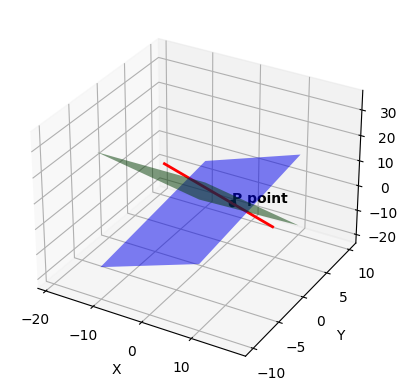

In [12]:
%matplotlib inline

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
x, y = np.meshgrid(x, y)

# Plane 1: 2x + y - 3z = 2
z_plane1 = (2 - 2*x - y) / -3

# Plane 2: x + 7y + 3z = 21
z_plane2 = (21 - x - 7*y) / 3

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

z_line = np.linspace(-10, 10, 100)
x_line = [float(x_sol.subs(z, zi)) for zi in z_line]
y_line = [float(y_sol.subs(z, zi)) for zi in z_line]

ax.plot(x_line, y_line, z_line, color='red', linewidth=2, zorder=3)

ax.plot_surface(x, y, z_plane1, alpha=0.5, rstride=100, cstride=100, color='blue', linewidth=0, zorder=1)
ax.plot_surface(x, y, z_plane2, alpha=0.5, rstride=100, cstride=100, color='green', linewidth=0, zorder=2)

ax.scatter(5, 1, 3, color="black", zorder=3)
ax.text(5, 1, 3, "P point", fontweight="bold")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [13]:
# P point lies on the intersection line of the two planes.

In [14]:
normal_vector_plane_1 = np.array([2, 1, -3])
normal_vector_plane_2 = np.array([1, 7, 3])

In [15]:
normal_vector_plane_1.dot(normal_vector_plane_2)

0

In [16]:
# They are perpendicular on each other